In [2]:
import json
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Load Dataset
with open(f'updated_dataset.json', 'r', encoding='utf-8-sig') as file:
    dataset = json.load(file)

In [4]:
labels = ["Lines Changed", "Filed Changed", "Lines Added", "Lines Removed"]
u_statistics = []
p_values = []

## Lines Changed Mann-Whitney U Test

In [5]:
sstub_lines_changed = [pr['linesChanged'] for pr in dataset if pr['sstubs']]
non_sstub_lines_changed = [pr['linesChanged'] for pr in dataset if not pr['sstubs']]

In [6]:
u_statistic, p_value = stats.mannwhitneyu(sstub_lines_changed, non_sstub_lines_changed, alternative='two-sided')
u_statistics.append(float(u_statistic))
p_values.append(float(p_value))

In [7]:
print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

U-statistic: 4196797.5
P-value: 1.2611699078799305e-51


## Files Changed Mann-Whitney U Test

In [8]:
sstub_files_changed = [pr['filesChanged'] for pr in dataset if pr['sstubs']]
non_sstub_files_changed = [pr['filesChanged'] for pr in dataset if not pr['sstubs']]

In [9]:
u_statistic, p_value = stats.mannwhitneyu(sstub_files_changed, non_sstub_files_changed, alternative='two-sided')
u_statistics.append(float(u_statistic))
p_values.append(float(p_value))

In [10]:
print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

U-statistic: 4157586.5
P-value: 6.389377699407586e-52


## Lines Added Mann-Whitney U Test

In [11]:
sstub_add_lines = [pr['linesAdded'] for pr in dataset if pr['sstubs']]
non_sstub_add_lines = [pr['linesAdded'] for pr in dataset if not pr['sstubs']]

In [12]:
u_statistic, p_value = stats.mannwhitneyu(sstub_add_lines, non_sstub_add_lines, alternative='two-sided')
u_statistics.append(float(u_statistic))
p_values.append(float(p_value))

In [13]:
print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

U-statistic: 4240614.5
P-value: 3.375925251483386e-54


## Lines Removed Mann-Whitney U Test

In [14]:
sstub_remove_lines = [pr['linesRemoved'] for pr in dataset if pr['sstubs']]
non_sstub_remove_lines = [pr['linesRemoved'] for pr in dataset if not pr['sstubs']]

In [15]:
u_statistic, p_value = stats.mannwhitneyu(sstub_remove_lines, non_sstub_remove_lines, alternative='two-sided')
u_statistics.append(float(u_statistic))
p_values.append(float(p_value))

In [16]:
print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

U-statistic: 3847948.5
P-value: 3.612516369342852e-34


## Analysis

In [17]:
print(f"U-statistics: {u_statistics}")
print(f"P-valuse: {p_values}")

U-statistics: [4196797.5, 4157586.5, 4240614.5, 3847948.5]
P-valuse: [1.2611699078799305e-51, 6.389377699407586e-52, 3.375925251483386e-54, 3.612516369342852e-34]


In [18]:
df = pd.DataFrame()
df['metric'] = labels
df['U-statistic'] = u_statistics
df['p-value'] = p_values

display(df)

,metric,U-statistic,p-value
0,Lines Changed,4196797.5,1.261170e-51
1,Filed Changed,4157586.5,6.389378e-52
2,Lines Added,4240614.5,3.375925e-54
3,Lines Removed,3847948.5,3.612516e-34


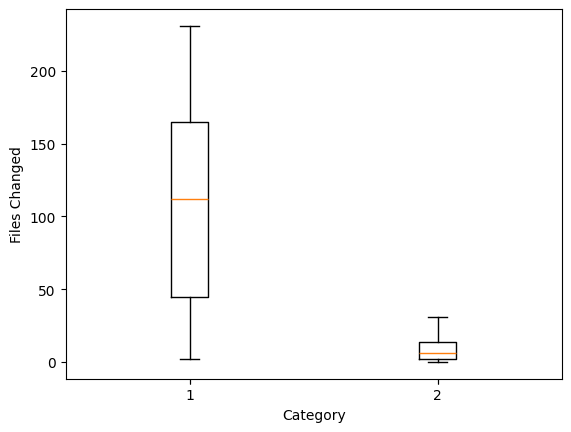

In [22]:
threshold = [np.percentile(sstub_files_changed, 95), np.percentile(non_sstub_files_changed, 95)]

filtered_lc = [
    [x for x in sstub_lines_changed if x <= threshold[0]],
    [x for x in non_sstub_lines_changed if x <= threshold[1]]
]
plt.xlabel("Category")
plt.ylabel("Files Changed")
plt.xticks([1, 2], ["SSTUB", "Non-SSTUB"])

plt.boxplot([filtered_lc[0], filtered_lc[1]])
plt.show()

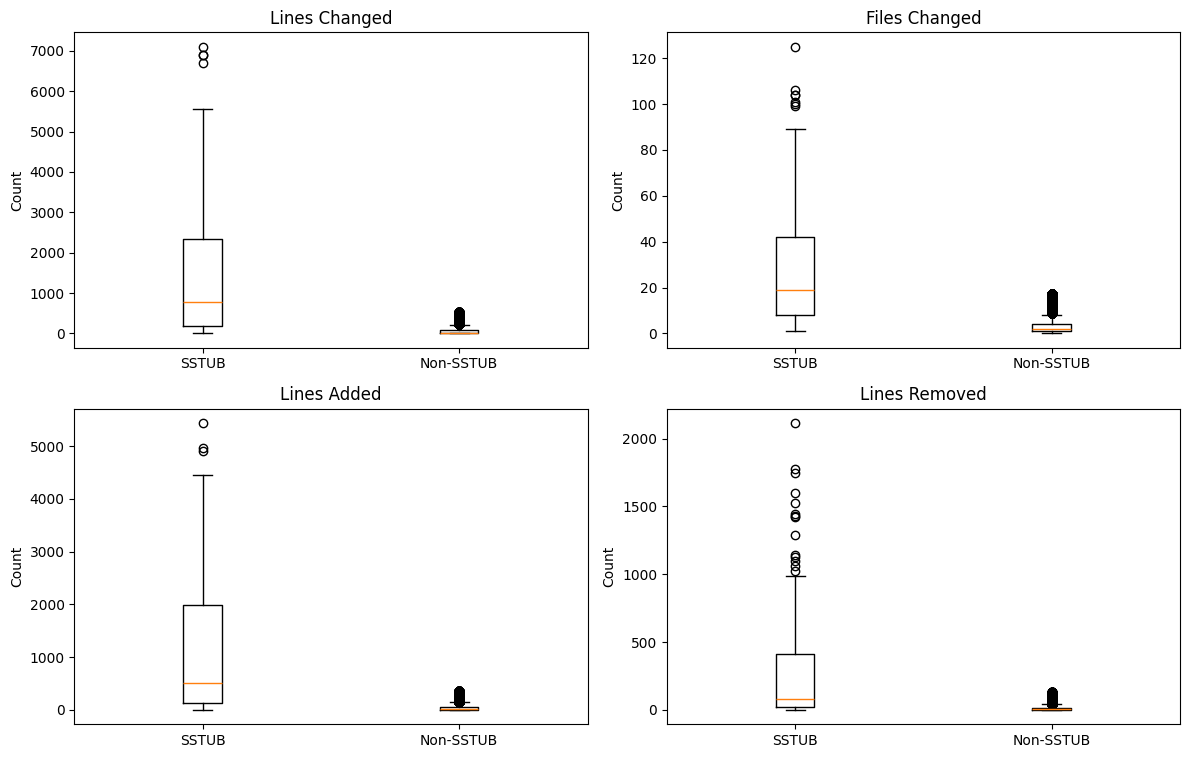

In [29]:
t = 90
thresholds = {
    "lines_changed": [np.percentile(sstub_lines_changed, t), np.percentile(non_sstub_lines_changed, t)],
    "lines_added": [np.percentile(sstub_add_lines, t), np.percentile(non_sstub_add_lines, t)],
    "lines_removed": [np.percentile(sstub_remove_lines, t), np.percentile(non_sstub_remove_lines, t)],
    "files_changed": [np.percentile(sstub_files_changed, t), np.percentile(non_sstub_files_changed, t)],
}

# Filtered data
filtered_data = {
    "lines_changed": [
        [x for x in sstub_lines_changed if x <= thresholds["lines_changed"][0]],
        [x for x in non_sstub_lines_changed if x <= thresholds["lines_changed"][1]]
    ],
    "lines_added": [
        [x for x in sstub_add_lines if x <= thresholds["lines_added"][0]],
        [x for x in non_sstub_add_lines if x <= thresholds["lines_added"][1]]
    ],
    "lines_removed": [
        [x for x in sstub_remove_lines if x <= thresholds["lines_removed"][0]],
        [x for x in non_sstub_remove_lines if x <= thresholds["lines_removed"][1]]
    ],
    "files_changed": [
        [x for x in sstub_files_changed if x <= thresholds["files_changed"][0]],
        [x for x in non_sstub_files_changed if x <= thresholds["files_changed"][1]]
    ],
}

# Set up the 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
#fig.suptitle("Comparison of PR Size Metrics (Filtered at 90th Percentile)", fontsize=16)

# Define the subplot layout
metric_titles = ["Lines Changed", "Files Changed", "Lines Added", "Lines Removed"]
metric_keys = ["lines_changed", "files_changed", "lines_added", "lines_removed"]

for i, ax in enumerate(axs.flat):
    metric = metric_keys[i]
    ax.boxplot(filtered_data[metric])
    ax.set_title(metric_titles[i])
    ax.set_xticks([1, 2])
    ax.set_xticklabels(["SSTUB", "Non-SSTUB"])
    ax.set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()